## Generating fake breast cancer images using GAN


References
https://arxiv.org/pdf/1406.2661.pdf


## Import libraries

In [76]:
!pip install torch

typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install torchvision

typing-extensions 3.7.4.1 has requirement typing>=3.7.4; python_version < "3.5", but you'll have typing 3.6.4 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image

## Load Data
* Define constants
* Load breast cancer dataset and apply transforms
* Define dataloader

In [5]:
batch_size = 1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))])

In [7]:
data = torchvision.datasets.ImageFolder(root='images/', transform=transform)

In [8]:
data

Dataset ImageFolder
    Number of datapoints: 277524
    Root location: images/
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [9]:
data_loader = torch.utils.data.DataLoader(dataset=data,
                                          batch_size=batch_size, 
                                          shuffle=True,
                                          num_workers=1)

## Visualize Data

In [10]:
images, labels = iter(data_loader).next()

In [11]:
images

tensor([[[[ 0.7804,  0.5216,  0.5922,  ..., -0.0902, -0.0039,  0.2863],
          [ 0.4196,  0.4039,  0.3333,  ...,  0.2471, -0.0196,  0.1294],
          [ 0.3098,  0.4353,  0.3569,  ...,  0.3098,  0.3176,  0.1922],
          ...,
          [ 0.0431,  0.0431,  0.3333,  ...,  0.5686,  0.4196,  0.5686],
          [ 0.3961,  0.1451,  0.3647,  ...,  0.3490,  0.2941,  0.4824],
          [ 0.2235,  0.2235,  0.2078,  ...,  0.1843,  0.6471,  0.2549]],

         [[ 0.6627,  0.3176,  0.4118,  ..., -0.4353, -0.3804, -0.0275],
          [ 0.1686,  0.1137, -0.0353,  ..., -0.1059, -0.3725, -0.2784],
          [-0.0588,  0.1216, -0.0431,  ..., -0.0588, -0.0745, -0.1608],
          ...,
          [-0.2863, -0.2627, -0.0275,  ...,  0.3176,  0.0039,  0.3098],
          [ 0.0275, -0.2078, -0.0196,  ...,  0.0039, -0.3098, -0.2784],
          [-0.0745, -0.0667, -0.1373,  ..., -0.0980,  0.3882, -0.0196]],

         [[ 0.7569,  0.5294,  0.6078,  ...,  0.0039,  0.0353,  0.3255],
          [ 0.4745,  0.4510,  

In [12]:
images.shape

torch.Size([1, 3, 50, 50])

In [13]:
labels

tensor([1])

In [14]:
len(labels)

1

In [15]:
img = torchvision.utils.make_grid(images)

In [16]:
img = img.detach().numpy()
img = img.clip(0,1)

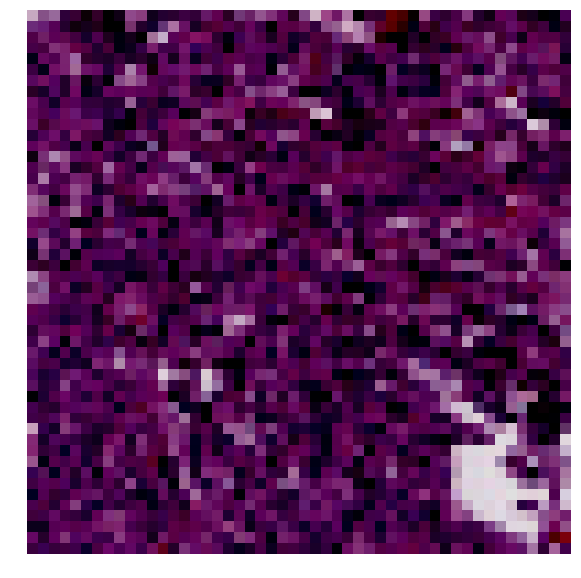

In [17]:
plt.figure(figsize = (12,10))
plt.imshow(np.transpose(img, (1,2,0)))
plt.axis('off')
plt.show()

## Define Neural Networks
* Define Hyper-parameters
* Define the Discriminator
* Define the Generator 



In [18]:
latent_size = 64
hidden_size = 256
image_size = 7500
num_epochs = 1

In [19]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Dropout(0.5),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid())

In [20]:
D

Sequential(
  (0): Linear(in_features=7500, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): LeakyReLU(negative_slope=0.2)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=256, out_features=1, bias=True)
  (7): Sigmoid()
)

In [21]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh())

In [22]:
G

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=7500, bias=True)
  (5): Tanh()
)

In [23]:
D = D.to(device)
G = G.to(device)

## Training

In [24]:
bce_loss = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [25]:
d_optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0002
    weight_decay: 0
)

In [26]:
g_optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0002
    weight_decay: 0
)

In [27]:
total_step = len(data_loader)

In [28]:
total_step

277524

In [29]:
labels

tensor([1])

In [30]:
images.shape

torch.Size([1, 3, 50, 50])

In [31]:
images = images.reshape(batch_size, -1).to(device)
print(images.shape)

torch.Size([1, 7500])


In [32]:
# Create the labels which are later used as input for the BCE loss
real_labels = torch.ones(batch_size, 1).to(device)
fake_labels = torch.zeros(batch_size, 1).to(device)
print(real_labels.shape)
print(fake_labels.shape)

torch.Size([1, 1])
torch.Size([1, 1])


In [33]:
outputs = D(images)

In [34]:
print(len(outputs))

1


In [35]:
d_loss_real = bce_loss(outputs, real_labels)

In [36]:
print(d_loss_real)

tensor(0.6768, grad_fn=<BinaryCrossEntropyBackward>)


In [37]:
real_score = outputs

In [38]:
print(real_score)

tensor([[0.5082]], grad_fn=<SigmoidBackward>)


In [39]:
z = torch.randn(batch_size, latent_size).to(device)

In [40]:
print(z)

tensor([[-4.5825e-01, -7.5672e-01, -2.0993e-01, -9.6704e-01,  1.7044e+00,
         -4.9892e-01,  6.8968e-01, -1.2894e+00, -4.4721e-01,  1.1660e+00,
          7.0301e-01,  9.5665e-01,  5.0005e-01, -5.4320e-01, -2.4620e-02,
         -1.4935e-01,  9.8199e-01,  1.4331e-01, -2.9720e-01, -1.8318e-01,
          3.9759e-01,  7.5468e-01, -6.0429e-01, -9.9365e-01,  1.3864e+00,
          9.1265e-01,  5.8497e-04,  2.0168e-01, -1.2096e+00,  2.8769e-01,
          1.2280e-01,  2.3379e+00, -1.4977e+00, -4.0523e-01,  1.2812e+00,
          2.2007e+00, -1.6488e+00,  1.4599e-01, -1.4575e+00, -1.3015e-01,
          1.9392e-02,  1.6427e-01, -1.1048e+00, -1.3490e-01,  6.6899e-01,
          9.8525e-01,  2.4966e-01,  2.7995e-02,  1.0118e+00, -2.0490e-01,
         -1.5961e+00,  6.9352e-01, -8.0327e-01,  1.7404e-01, -1.4417e+00,
          6.0758e-01,  3.8035e-01, -6.1052e-02,  5.5206e-01,  3.0877e-01,
         -3.0077e-01, -3.6882e-01,  1.1658e+00, -1.6603e-02]])


In [41]:
fake_images = G(z)

In [42]:
print(fake_images)

tensor([[ 0.0318, -0.0560,  0.0602,  ...,  0.0195,  0.0829, -0.1298]],
       grad_fn=<TanhBackward>)


In [43]:
outputs = D(fake_images)

In [44]:
outputs

tensor([[0.5059]], grad_fn=<SigmoidBackward>)

In [45]:
d_loss_fake = bce_loss(outputs, fake_labels)

In [46]:
print(d_loss_fake)

tensor(0.7051, grad_fn=<BinaryCrossEntropyBackward>)


In [47]:
fake_score = outputs

In [48]:
print(fake_score)

tensor([[0.5059]], grad_fn=<SigmoidBackward>)


In [49]:
d_loss = d_loss_real + d_loss_fake

In [50]:
print(d_loss)

tensor(1.3819, grad_fn=<AddBackward0>)


In [51]:
d_optimizer.zero_grad()

In [52]:
g_optimizer.zero_grad()

In [53]:
d_loss.backward()

In [54]:
d_optimizer.step()

In [55]:
z = torch.randn(batch_size, latent_size).to(device)

In [56]:
print(z)

tensor([[-0.2403,  0.3369,  1.5869,  2.3133,  0.7890, -0.0268,  1.6436, -0.3911,
         -0.5215,  0.5961,  0.2348, -0.9560,  0.6046,  1.4311, -1.4897, -0.2987,
          0.1396, -0.9216,  0.6910, -0.9369, -2.3121, -0.8900, -0.2402,  0.3048,
          1.5481, -0.3393,  0.5063, -1.6908, -1.0013,  0.5892,  0.0778, -0.2692,
          0.8414,  1.6439, -0.1234, -0.9559,  1.4181, -0.9257,  1.6890,  0.2982,
         -0.1416,  1.2656,  1.6226,  0.6034, -0.4833,  0.2318, -0.0364,  0.7796,
          0.3584,  1.8828, -1.2239, -0.9590, -0.6024, -1.1105, -0.4932, -1.2317,
          0.6879, -0.4413, -0.0613, -0.3230, -0.6703, -1.3599,  2.4310,  1.3562]])


In [57]:
fake_images = G(z)

In [58]:
print(fake_images)

tensor([[ 0.0085, -0.0903, -0.0675,  ..., -0.0084,  0.1834, -0.0538]],
       grad_fn=<TanhBackward>)


In [59]:
outputs = D(fake_images)

In [60]:
print(outputs)

tensor([[0.5051]], grad_fn=<SigmoidBackward>)


In [61]:
g_loss = bce_loss(outputs, real_labels)

In [62]:
print(g_loss)

tensor(0.6830, grad_fn=<BinaryCrossEntropyBackward>)


In [63]:
d_optimizer.zero_grad()

In [64]:
g_optimizer.zero_grad()

In [65]:
g_loss.backward()

In [66]:
g_optimizer.step()

In [67]:
images.shape

torch.Size([1, 7500])

In [68]:
len(data_loader)

277524

In [69]:
def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)


In [70]:
sample_dir="samples/"

In [71]:
for epoch in range(num_epochs):
    
    for i in range(0,len(data_loader)):
        if (i+1) % 277524 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 3, 50, 50)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))

Epoch [0/1], Step [277524/277524], d_loss: 1.3819, g_loss: 0.6830, D(x): 0.51, D(G(z)): 0.51


In [ ]:
for epoch in range(num_epochs):
    
    for i in range(0,len(data_loader)):
        
        images = images.reshape(batch_size, -1).to(device)
        
        # Create the labels which are later used as input for the BCE loss
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ================================================================== #
        #                      Train the discriminator                       #
        # ================================================================== #

        # Compute BCE_Loss using real images where BCE_Loss(x, y): - y * log(D(x)) - (1-y) * log(1 - D(x))
        
        outputs = D(images)

        # Second term of the loss is always zero since real_labels == 1
        # This is what causes it to minimize the loss for real images
        d_loss_real = bce_loss(outputs, real_labels)
        real_score = outputs
        
        # Compute BCELoss using fake images
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        
        outputs = D(fake_images)

        # First term of the loss is always zero since fake_labels == 0
        # This is what causes it to maximize the loss for fake images
        d_loss_fake = bce_loss(outputs, fake_labels)
        fake_score = outputs
        
        # Backprop and optimize
        d_loss = d_loss_real + d_loss_fake
        
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()
        
        d_loss.backward()
        d_optimizer.step()
        
        # ================================================================== #
        #                        Train the generator                         #
        # ================================================================== #

        # Compute loss with fake images
        
        z = torch.randn(batch_size, latent_size).to(device)
        fake_images = G(z)
        outputs = D(fake_images)
        
        # We train G to maximize log(D(G(z)) instead of minimizing log(1-D(G(z)))
        # For the reason, see the last paragraph of section 3. https://arxiv.org/pdf/1406.2661.pdf
        
        g_loss = bce_loss(outputs, real_labels)
        
        # Backprop and optimize
        d_optimizer.zero_grad()
        g_optimizer.zero_grad()

        g_loss.backward()
        g_optimizer.step()
        
        if (i+1) % 1000 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    
    fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)
    # Save real images
    if (epoch+1) == 1:
        images = images.reshape(images.size(0), 3, 50, 50)
        save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'))
    
    # Save sampled images
    fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)
    save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-{}.png'.format(epoch+1)))

# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

Epoch [0/1], Step [1000/277524], d_loss: 0.2524, g_loss: 0.6783, D(x): 0.89, D(G(z)): 0.12
Epoch [0/1], Step [2000/277524], d_loss: 0.6601, g_loss: 0.4139, D(x): 0.74, D(G(z)): 0.30
Epoch [0/1], Step [3000/277524], d_loss: 1.7339, g_loss: 0.8111, D(x): 0.51, D(G(z)): 0.65
Epoch [0/1], Step [4000/277524], d_loss: 1.5635, g_loss: 0.5208, D(x): 0.57, D(G(z)): 0.63
Epoch [0/1], Step [5000/277524], d_loss: 1.1782, g_loss: 0.8482, D(x): 0.48, D(G(z)): 0.36
Epoch [0/1], Step [6000/277524], d_loss: 1.6184, g_loss: 0.7285, D(x): 0.50, D(G(z)): 0.60
Epoch [0/1], Step [7000/277524], d_loss: 1.8720, g_loss: 0.4732, D(x): 0.45, D(G(z)): 0.66
Epoch [0/1], Step [8000/277524], d_loss: 2.0546, g_loss: 0.3876, D(x): 0.66, D(G(z)): 0.81
Epoch [0/1], Step [9000/277524], d_loss: 1.2466, g_loss: 0.6318, D(x): 0.67, D(G(z)): 0.57
Epoch [0/1], Step [10000/277524], d_loss: 1.2037, g_loss: 0.6879, D(x): 0.52, D(G(z)): 0.43
Epoch [0/1], Step [11000/277524], d_loss: 1.0381, g_loss: 0.8231, D(x): 0.61, D(G(z)): 0.

## Visualize Results

In [80]:
fake_images

tensor([[[[ 0.8021,  0.5387,  0.5786,  ..., -0.1229,  0.0216,  0.2727],
          [ 0.4456,  0.4173,  0.2826,  ...,  0.2703, -0.0586,  0.0940],
          [ 0.3286,  0.4389,  0.3919,  ...,  0.2907,  0.3445,  0.1927],
          ...,
          [ 0.0623,  0.0128,  0.3254,  ...,  0.5883,  0.4063,  0.5534],
          [ 0.4502,  0.1783,  0.3752,  ...,  0.3633,  0.3077,  0.4792],
          [ 0.2313,  0.2049,  0.1589,  ...,  0.2358,  0.6545,  0.2755]],

         [[ 0.6989,  0.3322,  0.4090,  ..., -0.4056, -0.3495, -0.0618],
          [ 0.1586,  0.1344, -0.0076,  ..., -0.1233, -0.3825, -0.3002],
          [-0.0533,  0.0898, -0.0763,  ..., -0.0439, -0.0933, -0.1898],
          ...,
          [-0.3315, -0.2942, -0.0169,  ...,  0.3053,  0.0111,  0.2753],
          [ 0.0677, -0.1997, -0.0053,  ...,  0.0344, -0.3195, -0.2755],
          [-0.0969, -0.0436, -0.1045,  ..., -0.1061,  0.3880, -0.0194]],

         [[ 0.7884,  0.5124,  0.6022,  ...,  0.0358,  0.0080,  0.3203],
          [ 0.4493,  0.4740,  

In [81]:
fake_images = fake_images.reshape(fake_images.size(0), 3, 50, 50)
save_image(denorm(fake_images), os.path.join(sample_dir, 'fake_images-main.png'.format(epoch+1)))

In [82]:
img = torchvision.utils.make_grid(fake_images)

In [83]:
img = img.detach().cpu().numpy()
img = img.clip(0,1)

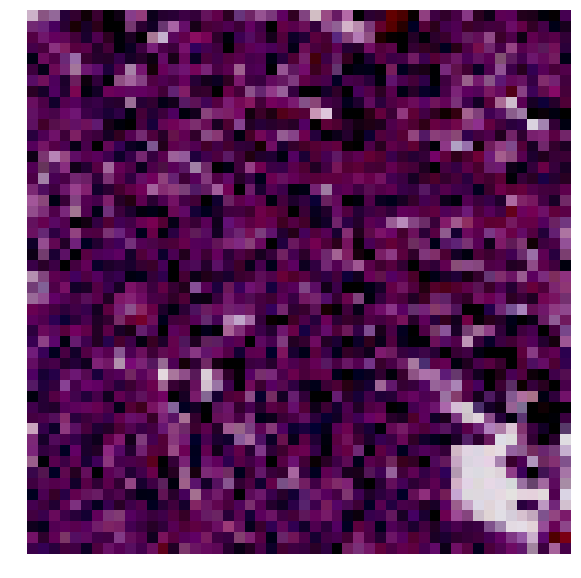

In [84]:
plt.figure(figsize = (12, 10))
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('off')
plt.show()